# Lab | Customer Analysis Final Round

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

01 - Problem (case study)

Data Description.
Goal.
02 - Getting Data

Read the .csv file.
03 - Cleaning/Wrangling/EDA

Change headers names.
Deal with NaN values.
Categorical Features.
Numerical Features.
Exploration.
04 - Processing Data

Dealing with outliers.
Normalization.
Encoding Categorical Data.
Splitting into train set and test set.
05 - Modeling

Apply model.
06 - Model Validation

R2.
MSE.
RMSE.
MAE.
07 - Reporting

Present results.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [11]:
data = pd.read_csv('/Users/igorhufnagel/Desktop/Ironhack/LABS/Week 3/LAB_customer-analysis-round-8/lab-customer-analysis-final-round/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [12]:
data.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [16]:
cols = []
for column in range(len(data.columns)):
    cols.append(data.columns[column].lower())
data.columns = cols

In [17]:
data.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [18]:
data.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [19]:
data.drop_duplicates()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [20]:
numericals = data.select_dtypes(include=['float64', 'int64'])
categoricals = data.select_dtypes('object')

In [21]:
numericals.head().T

,0,1,2,3,4
customer lifetime value,2763.519279,6979.535903,12887.431650,7645.861827,2813.692575
income,56274.000000,0.000000,48767.000000,0.000000,43836.000000
monthly premium auto,69.000000,94.000000,108.000000,106.000000,73.000000
months since last claim,32.000000,13.000000,18.000000,18.000000,12.000000
months since policy inception,5.000000,42.000000,38.000000,65.000000,44.000000
number of open complaints,0.000000,0.000000,0.000000,0.000000,0.000000
number of policies,1.000000,8.000000,2.000000,7.000000,1.000000
total claim amount,384.811147,1131.464935,566.472247,529.881344,138.130879


In [22]:
categoricals.head().T

,0,1,2,3,4
customer,BU79786,QZ44356,AI49188,WW63253,HB64268
state,Washington,Arizona,Nevada,California,Washington
response,No,No,No,No,No
coverage,Basic,Extended,Premium,Basic,Basic
education,Bachelor,Bachelor,Bachelor,Bachelor,Bachelor
effective to date,2/24/11,1/31/11,2/19/11,1/20/11,2/3/11
employmentstatus,Employed,Unemployed,Employed,Unemployed,Employed
gender,F,F,F,M,M
location code,Suburban,Suburban,Suburban,Suburban,Rural
marital status,Married,Single,Married,Married,Single


In [24]:
numericals.drop(['months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies'], axis=1,inplace=True)

In [25]:
numericals.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'total claim amount'],
      dtype='object')

In [27]:
categoricals.drop(['customer','effective to date', 'response', 'vehicle size','policy' ],axis = 1,inplace = True)

In [29]:
categoricals.columns

Index(['state', 'coverage', 'education', 'employmentstatus', 'gender',
       'location code', 'marital status', 'policy type', 'renew offer type',
       'sales channel', 'vehicle class'],
      dtype='object')

In [32]:
numericals['income'] = numericals['income'].replace(0, numericals['income'].mean())

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
for col in categoricals.columns:
    categoricals[col]=LabelEncoder().fit(categoricals[col]).transform(categoricals[col])

In [43]:
new = pd.concat([numericals, categoricals], axis=1)

In [44]:
new.head()

,customer lifetime value,income,monthly premium auto,total claim amount,state,coverage,education,employmentstatus,gender,location code,marital status,policy type,renew offer type,sales channel,vehicle class
0,2763.519279,56274.000000,69,384.811147,4,0,0,1,0,1,1,0,0,0,5
1,6979.535903,37657.380009,94,1131.464935,0,1,0,4,0,1,2,1,2,0,0
2,12887.431650,48767.000000,108,566.472247,2,2,0,1,0,1,1,1,0,0,5
3,7645.861827,37657.380009,106,529.881344,1,0,0,4,1,1,1,0,0,2,3
4,2813.692575,43836.000000,73,138.130879,4,0,0,1,1,0,2,1,0,0,0


In [45]:
new.head().T

,0,1,2,3,4
customer lifetime value,2763.519279,6979.535903,12887.431650,7645.861827,2813.692575
income,56274.000000,37657.380009,48767.000000,37657.380009,43836.000000
monthly premium auto,69.000000,94.000000,108.000000,106.000000,73.000000
total claim amount,384.811147,1131.464935,566.472247,529.881344,138.130879
state,4.000000,0.000000,2.000000,1.000000,4.000000
coverage,0.000000,1.000000,2.000000,0.000000,0.000000
education,0.000000,0.000000,0.000000,0.000000,0.000000
employmentstatus,1.000000,4.000000,1.000000,4.000000,1.000000
gender,0.000000,0.000000,0.000000,1.000000,1.000000
location code,1.000000,1.000000,1.000000,1.000000,0.000000


In [46]:
X = new.drop(['total claim amount'],axis = 1)
Y = new['total claim amount']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.8, random_state=140)

In [48]:
model = sm.OLS(y_train,X_train).fit()

In [49]:
predictions = model.predict(X_test)

In [50]:
# R2

r2_score(y_test, predictions)

0.5713087950208922

In [51]:
# MSE

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)

print (mse)

36422.73745469427


In [52]:
# RMSE 

import math

rmse = math.sqrt(mse)
print (rmse)

190.8474193032074


In [53]:
# MAE

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,predictions)
print (mae)

138.88287773174514


In [54]:
Y.describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total claim amount, dtype: float64

In [55]:
corr_matrix = np.corrcoef(y_test, predictions)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.5755881745084528


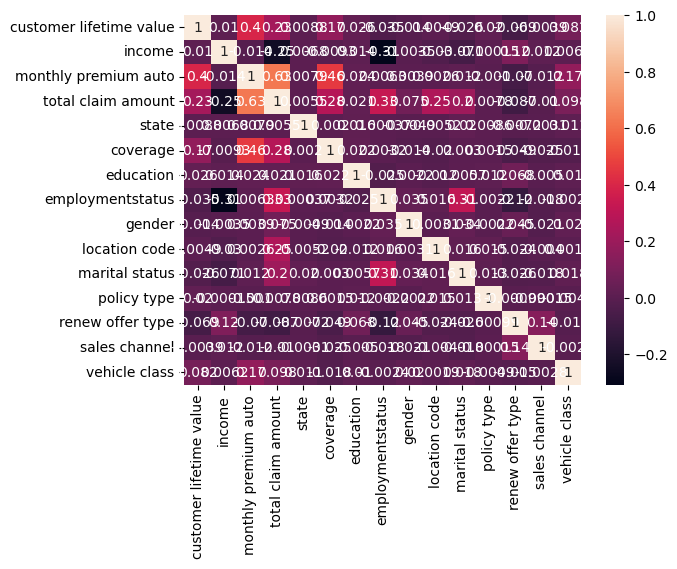

In [56]:
sns.heatmap(new.corr(), annot = True)
plt.show()

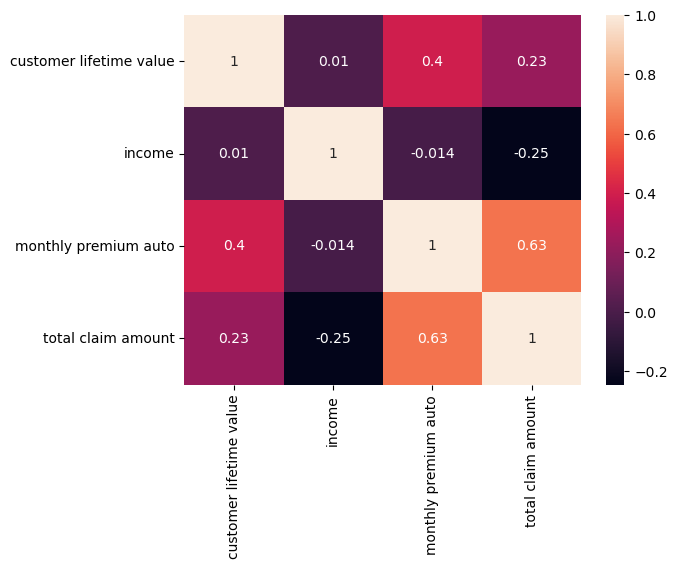

In [57]:
sns.heatmap(numericals.corr(), annot = True)
plt.show()

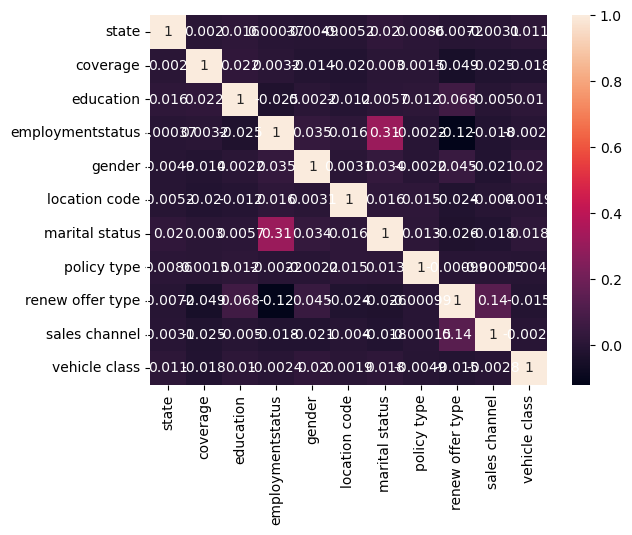

In [58]:
sns.heatmap(categoricals.corr(), annot = True)
plt.show()

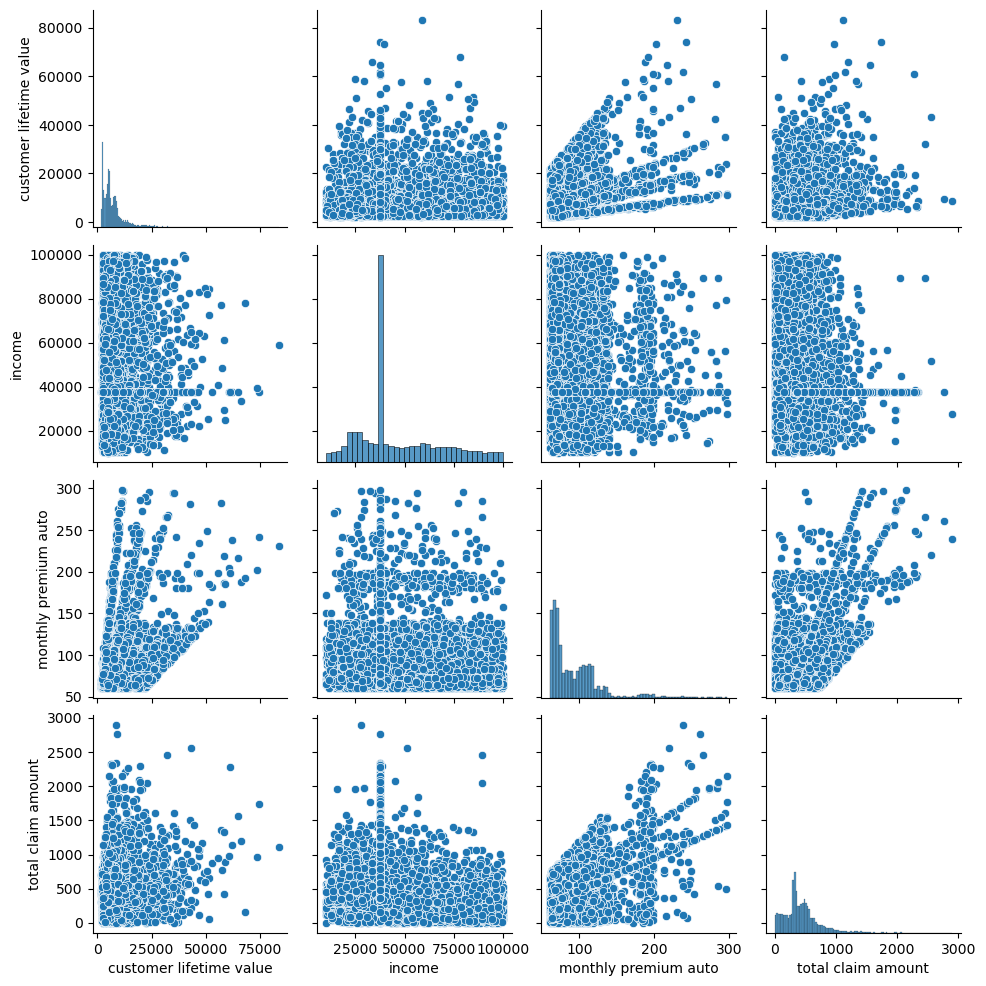

In [60]:
sns.pairplot(numericals)
plt.show()

In [62]:
import scipy.stats as stats

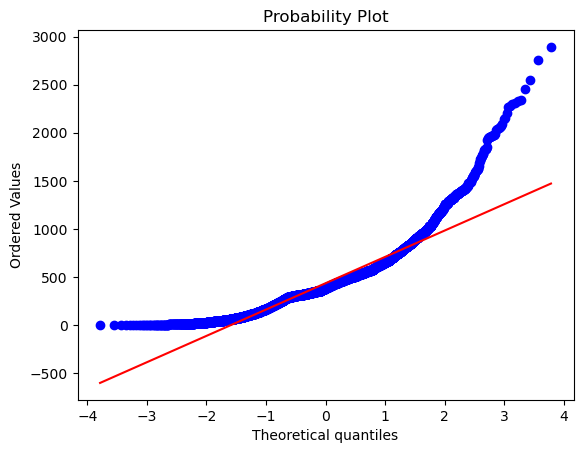

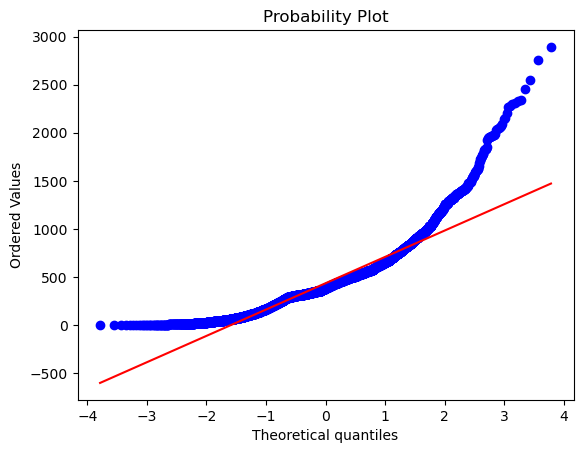

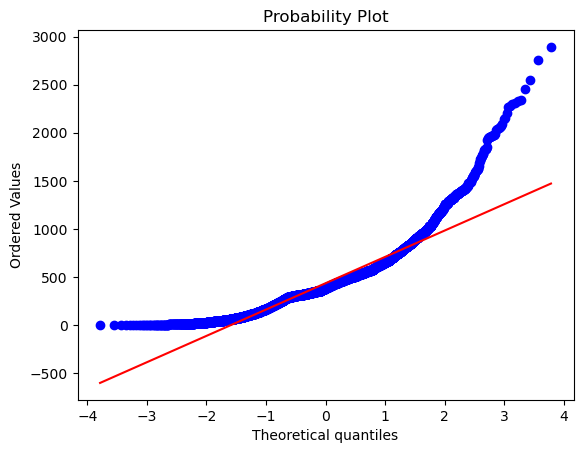

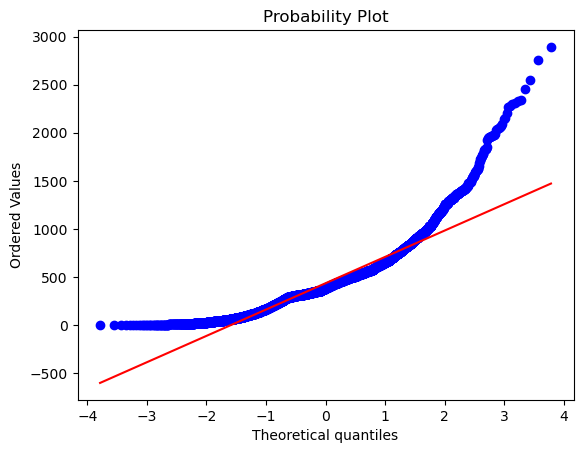

In [68]:
for columns in numericals.columns:
    stats.probplot(numericals['total claim amount'], dist='norm', plot=plt)
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

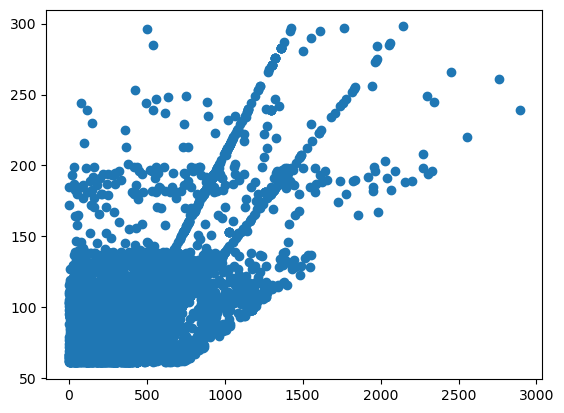

In [69]:
plt.scatter(new['total claim amount'],new['monthly premium auto'])
plt.show

In [ ]:
# Total Claim Amont and Montlhly Premium Auto are the ones more correlated to the other.